<a href="https://colab.research.google.com/github/cleuber979/Analise_Dados_colab/blob/main/Analise_Dados_Ns1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução
Esta analise abaixo foi feita utilizando dados do tempo de paradas de máquina do NS1 custo de peças mão de obra e tipo de ordem de serviço.
Nossa motivação e entender os tipos de paradas e alocação de mão de obra para que futuramente teremos uma melhor gestão, etender custo e diminuição de horas de paradas de produção
<br>
<br>
Fonte:Dados do ultimo mês de paradas do NS1

Nota: Forma de pensar na análise -> Analizar o Dataset (estrutura)- Analise univariada. bivariada Multivariada

**1.Carregando Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')



**2 Carregando DataSet**

In [ ]:
ns1=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/analiseDadosNS1.xlsx')

In [ ]:
ns1.head()

,Ordem_Trabalho,Máquina_Solicitante,Data_Solicitação,Hora_inicio,Hora_termino,Total_Horas,consumo_Pecas_JN,Depanadores,Tipo_Trabalho
0,Res12456,Bd5,2024-01-05,12:00:00,13:50:00,01:50:00,100,1,D
1,Res12985,Bd1,2024-01-06,14:15:00,18:27:00,04:12:00,45,5,D
2,Res14423,Bd1,2024-01-07,01:05:00,04:00:00,02:55:00,100,2,E
3,Res12254,Bd2,2024-01-08,19:00:00,23:59:00,04:59:00,1500,3,E
4,Res75542,Fnc,2024-01-09,08:00:00,12:30:00,04:30:00,2500,5,D


In [ ]:
ns1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ordem_Trabalho       19 non-null     object        
 1   Máquina_Solicitante  19 non-null     object        
 2   Data_Solicitação     19 non-null     datetime64[ns]
 3   Hora_inicio          19 non-null     object        
 4   Hora_termino         19 non-null     object        
 5   Total_Horas          19 non-null     object        
 6   consumo_Pecas_JN     19 non-null     int64         
 7   Depanadores          19 non-null     int64         
 8   Tipo_Trabalho        19 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.5+ KB


In [ ]:
ns1.shape

(19, 9)

In [ ]:
ns1.columns

Index(['Ordem_Trabalho', 'Máquina_Solicitante', 'Data_Solicitação',
       'Hora_inicio', 'Hora_termino', 'Total_Horas', 'consumo_Pecas_JN',
       'Depanadores', 'Tipo_Trabalho'],
      dtype='object')

**3  Analisando DataSet**

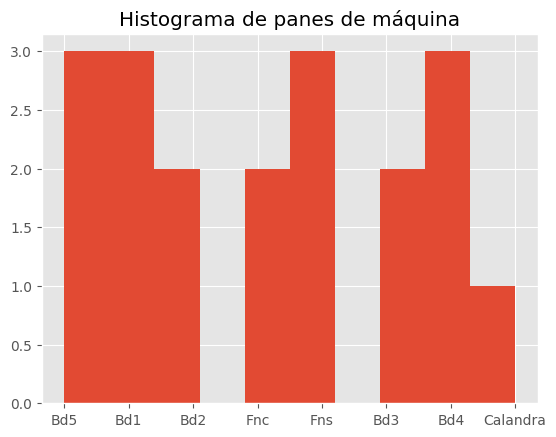

In [ ]:
_ = plt.hist(ns1.Máquina_Solicitante)
_ = plt.title('Histograma de panes de máquina')

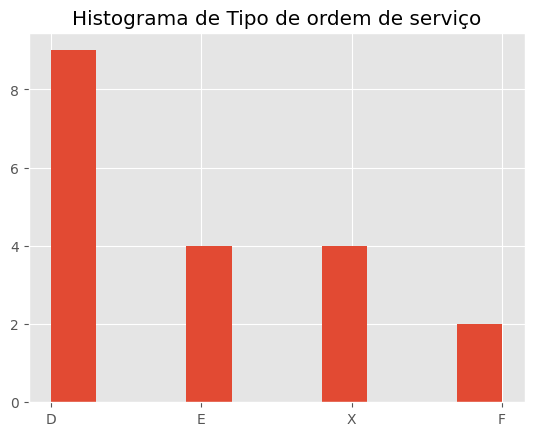

In [ ]:
_ = plt.hist(ns1.Tipo_Trabalho)
_ = plt.title('Histograma de Tipo de ordem de serviço')

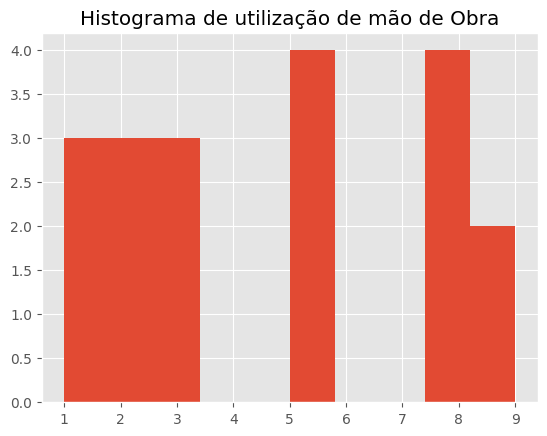

In [ ]:
_ = plt.hist(ns1.Depanadores)
_ = plt.title('Histograma de utilização de mão de Obra')

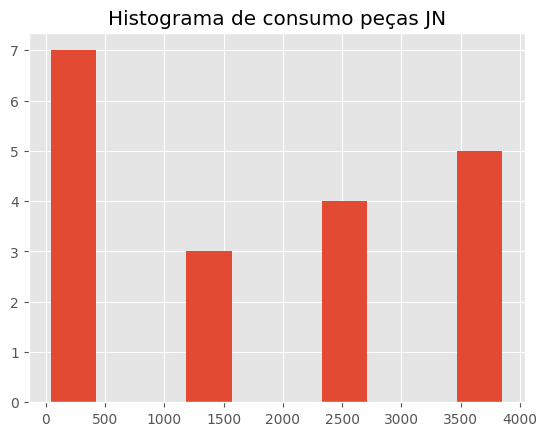

In [ ]:
_ = plt.hist(ns1.consumo_Pecas_JN)
_ = plt.title('Histograma de consumo peças JN')

In [ ]:
ns1.consumo_Pecas_JN.value_counts()

3850    5
2500    4
100     3
250     3
1400    2
45      1
1500    1
Name: consumo_Pecas_JN, dtype: int64

<Axes: >

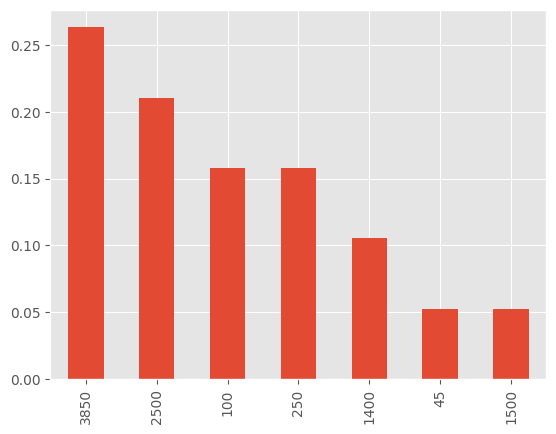

In [ ]:
ns1.consumo_Pecas_JN.value_counts(1).plot.bar()

 **Vemos que as máquina que mais tiveram ordem de trabalho tipo D foram Prep.Quente.Também foram as que mais requisitaram peças no JN**

**4 Analise de Dados Bivariada**

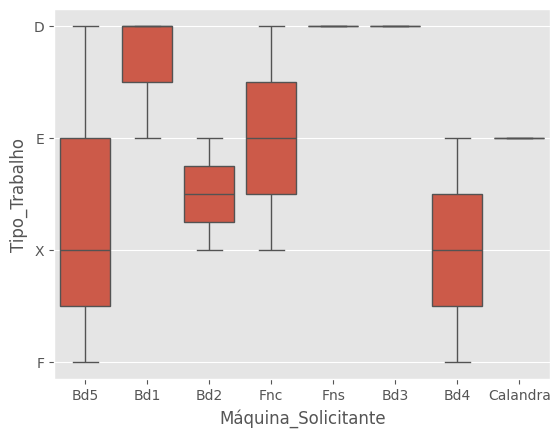

In [ ]:
_=sns.boxplot(x='Máquina_Solicitante',y='Tipo_Trabalho',data=ns1)

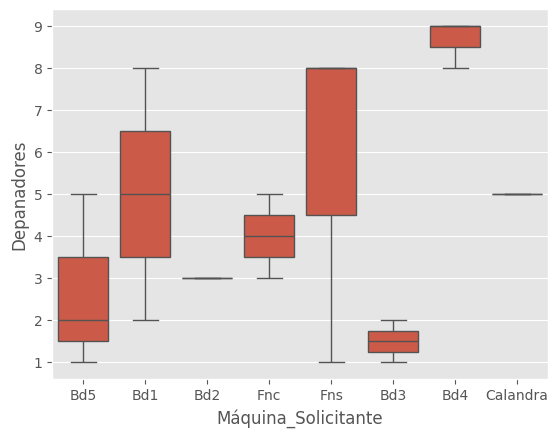

In [ ]:
_=sns.boxplot(x='Máquina_Solicitante',y='Depanadores',data=ns1)

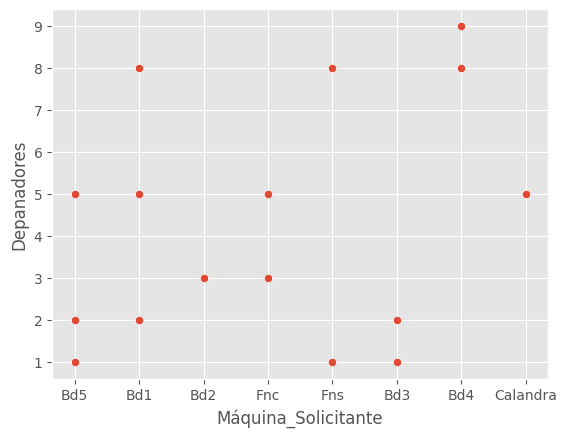

In [ ]:
_=sns.scatterplot(x='Máquina_Solicitante',y='Depanadores',data = ns1)


In [ ]:
ns1.corr()

<ipython-input-20-2e84e4f2b145>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ns1.corr()


,consumo_Pecas_JN,Depanadores
consumo_Pecas_JN,1.00000,0.58406
Depanadores,0.58406,1.00000
